In [16]:
import random
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

### 生成数据集

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
features[0:2]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.55224204,  0.08103967],
       [-0.23341082,  0.12625961]], dtype=float32)>

In [6]:
labels[0:2]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.820991 ],
       [3.3030922]], dtype=float32)>

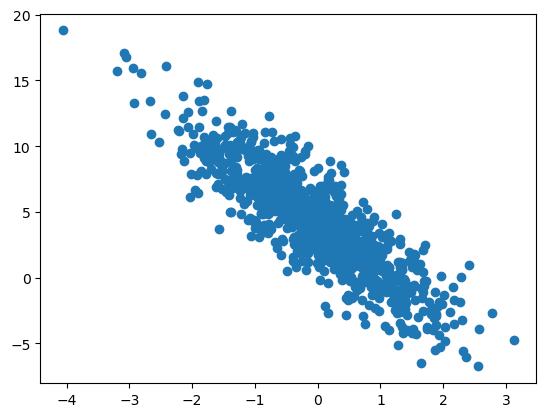

In [17]:
plt.scatter(features[:,1], labels)

### 读取数据集

In [18]:
# 使用生成器
def data_iter(batch_size, features, labels):
    num_examples = len(features) # 所有样本的总数
    indices = list(range(num_examples)) # 生成所有样本的索引
    random.shuffle(indices) # 打乱样本的顺序
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i+batch_size, num_examples)])
        yield tf.gather(features,j), tf.gather(labels, j) # tf.gather将根据axis=0的索引取出tensor

In [19]:
batch_size = 10

# 使用for循环调用生成器
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.7972062   0.25538462]
 [ 0.51525015 -0.3881572 ]
 [-0.52109563 -0.28336507]
 [ 0.43925217  0.988897  ]
 [ 0.6322413   1.6922798 ]
 [ 1.7869518  -0.42324507]
 [-0.41736773 -1.6922894 ]
 [-2.1076207  -0.18869247]
 [ 0.31898582 -1.2802953 ]
 [-0.8207887   0.4899999 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 1.7405643 ]
 [ 6.546561  ]
 [ 4.1098757 ]
 [ 1.7278496 ]
 [-0.26752138]
 [ 9.2025385 ]
 [ 9.1246    ]
 [ 0.6136282 ]
 [ 9.198862  ]
 [ 0.87968683]], shape=(10, 1), dtype=float32)


### 初始化模型参数 

In [65]:
w = tf.Variable(tf.random.normal((2,1),mean=0, stddev=0.01),trainable=True)
b = tf.Variable(tf.zeros(1),trainable=True)

### 定义模型 

In [66]:
# 注意这里的计算要使用tensor
def linreg(X, w, b):
    return tf.matmul(X, w)+b

### 定义损失函数 

In [67]:
# 注意这里的计算要使用tensor
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2 

### 定义优化算法 

In [68]:
def sgd(params, grads, lr, batch_size):
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

### 开始训练 

In [69]:
# 设置超参数
config = {
    'num_epochs' : 3,
    'lr' : 0.03,
    'batch_size' : 3
}

In [70]:
num_epochs = config['num_epochs']
lr = config['lr']
batch_size = config['batch_size']

In [71]:
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            y_hat = net(X, w, b)
            l = loss(y_hat, y)
            # 计算loss关于params的梯度
            dw, db = g.gradient(l,[w,b])
            sgd([w,b], [dw, db], lr, batch_size)
    train_loss = loss(net(features, w, b), labels)
    print('epoch{}, loss{}'.format(epoch+1, float(tf.reduce_mean(train_loss))))

epoch1, loss5.041599433752708e-05
epoch2, loss5.129538840265013e-05
epoch3, loss5.1316455937922e-05


In [74]:
true_w

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 2. , -3.4], dtype=float32)>

In [75]:
print('w的估计误差为{}'.format(true_w - tf.reshape(w, true_w.shape)))
print('b的估计误差为{}'.format(true_b-b))

w的估计误差为[-0.00055289  0.00111294]
b的估计误差为[-0.00099134]
